In [1]:
import catalax as ctx
import jax.numpy as jnp
import pyenzyme as pe

ModuleNotFoundError: No module named 'jaxlib.xla_extension'

## Catalax Modelling

Within this notebook, we will use Catalax to model the reaction of ABTS with SLAC. For this, we will use the EnzymeML file `enzmldoc.json` which contains the following information:

- The reaction of ABTS with SLAC
- The kinetic parameters for the reaction
- The initial conditions for the reaction
- The measurements for the reaction

Catalax is a JAX-based library for modelling biochemical reactions and provides a high-level interface for creating and simulating models as well as their modelling through conventional local methods, bayesian inference and machine learning.

Once finished, we will display the fit statistics and the fitted kinetic parameters. Finally, we will plot the results of the simulation and the measurements.

In [2]:
enzmldoc = pe.read_enzymeml(
    "../EnzymeML_Documents/SLAC_kinetic_assay_concentration.json"
)
dataset, model = ctx.Dataset.from_enzymeml(enzmldoc, from_reactions=True)

In [5]:
result, fitted_model = ctx.optimize(
    model=model,
    dataset=dataset,
    global_upper_bound=1000000,
    global_lower_bound=1e-6,
    method="nelder",
    objective_fun=lambda x, y: jnp.mean((x - y) ** 2),
)

<lmfit.minimizer.MinimizerResult object at 0x356dc3f50>

/Users/janrange/GitHub/Catalax/catalax/dataset/dataset.py:873: UserWarning: The figure layout has changed to tight
  plt.tight_layout(w_pad=4, h_pad=4)


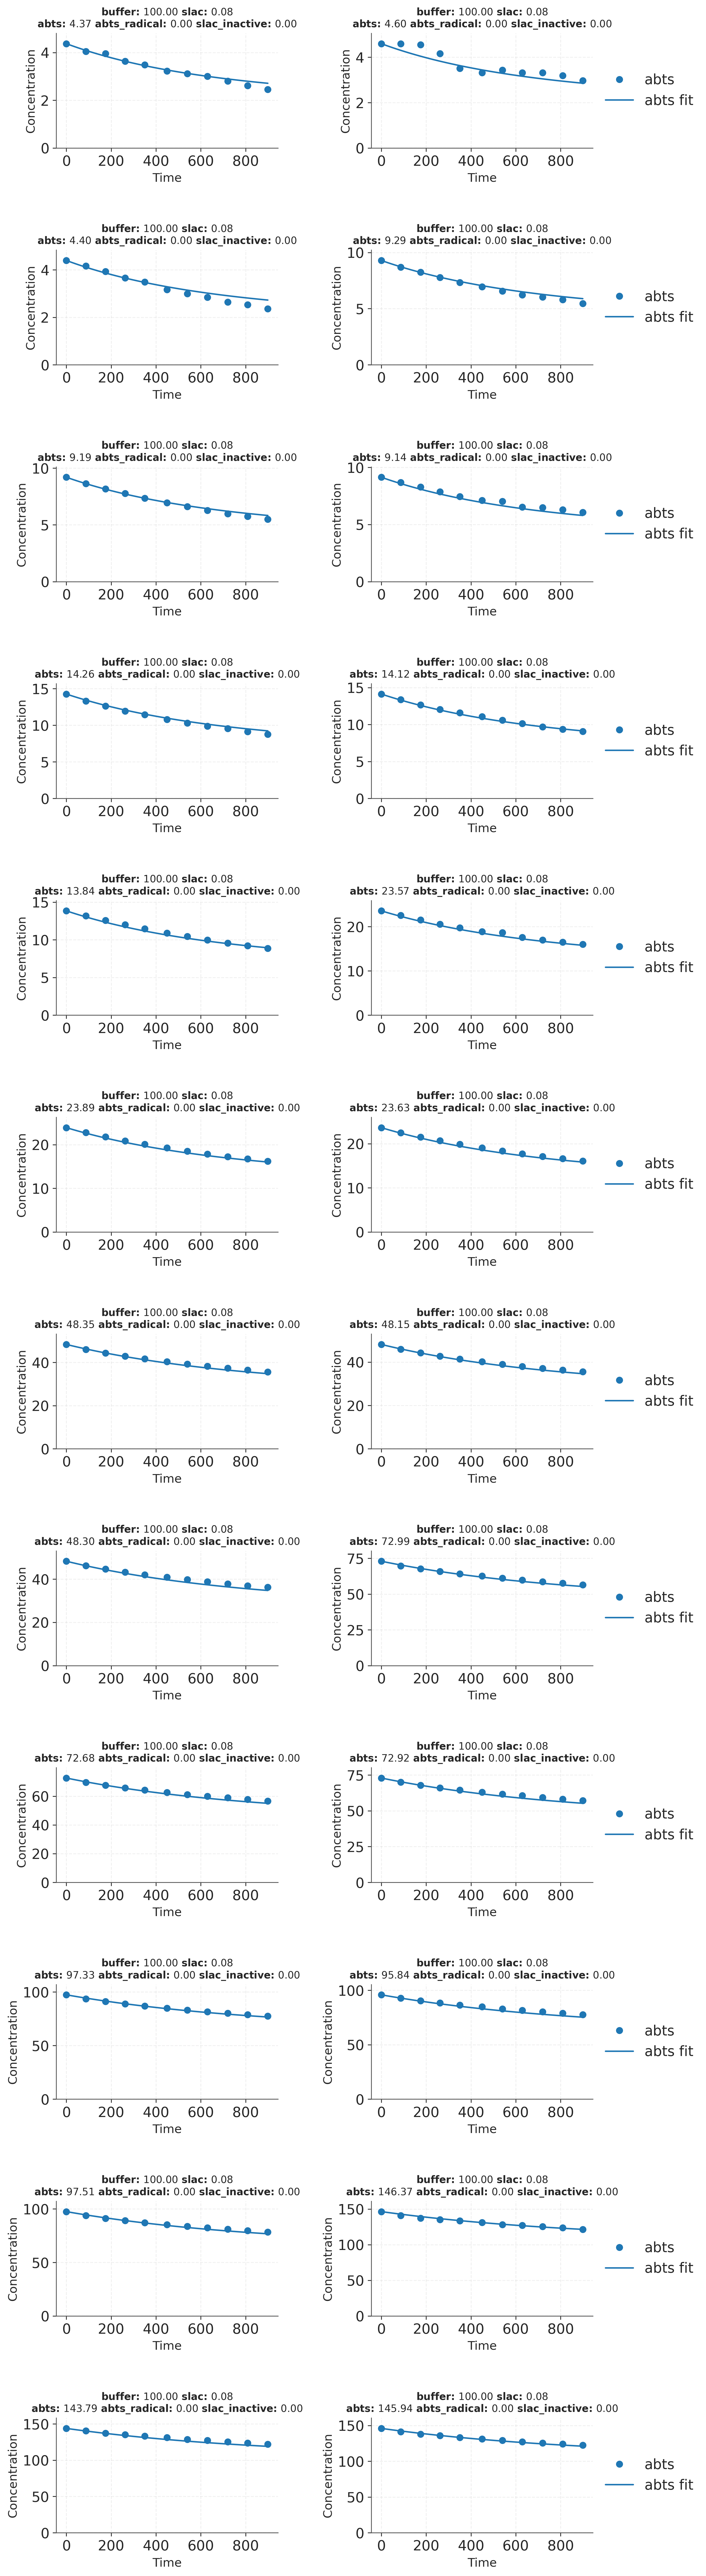

In [9]:
f = dataset.plot(predictor=model, path="results/catalax_jax_modelling.png")

In [8]:
fitted_model.update_enzymeml_parameters(enzmldoc)
pe.write_enzymeml(enzmldoc, "results/fitted_model.json")

EnzymeML document written to results/fitted_model.json